In [50]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline 

In [51]:
df = pd.read_csv('data.csv')
df1 = df.to_numpy()
X = df1[:,:-1]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Y = df1[:,-1:].reshape(X.shape[0],)

In [52]:
train_size = int(X.shape[0]/5*4)
X_train = X[:train_size]
Y_train = Y[:train_size]
X_test = X[train_size:]
Y_test = Y[train_size:]

In [53]:
# lamb = [i/1000 for i in range(1,10000,10)]
lamb = [0.001,0.01,0.1,1,10,100]
cVals = [1/i for i in lamb]

In [54]:
def plot_acc(acc_train, acc_test, lamb):
    plt.xlabel('log of lambda')
    plt.ylabel('accuracy')
    plt.title("Accuracy vs log of lambda.")
    plt.grid()
    plt.scatter(np.log10(lamb),acc_train,color='green', label = "training")
    plt.scatter(np.log10(lamb),acc_test,color='blue', label = "testing")
    plt.legend(['Training Accuracy', 'Test Accuracy'], )
    plt.show(block=False)

In [55]:
def plot_weight(acc_test, weight):
    max_acc = max(acc_test)
    index = acc_test.index(max_acc)
    print(max_acc, lamb[index])
    weight[index]
    plt.bar([i for i in range(len(weight[0]))],weight[index])

In [56]:
from sklearn import svm
def svm_linear(c):
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(X_train, Y_train)

    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = svc_linear.score(X_train, Y_train)
    
    acc_train_svm_linear.append(acc_train)
    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = svc_linear.score(X_test, Y_test)

    acc_test_svm_linear.append(acc_test)
    weight_svm_linear.append(svc_linear.coef_[0])
    intercept_svm_linear.append(svc_linear.intercept_)

In [57]:
acc_train_svm_linear = []
acc_test_svm_linear = []
weight_svm_linear = []
intercept_svm_linear = []
for c in cVals:
    svm_linear(c)

0.8486739469578783 0.001


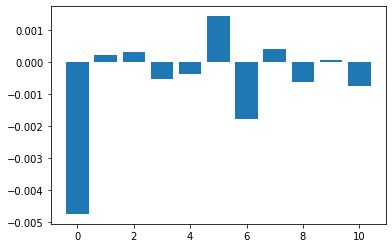

In [58]:
plot_weight(acc_test_svm_linear, weight_svm_linear)

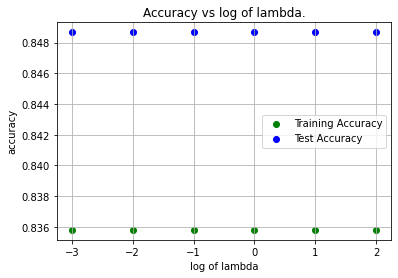

In [59]:
plot_acc(acc_train_svm_linear, acc_test_svm_linear, lamb)

In [60]:
def svm_rbf(c):
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(X_train, Y_train)
   
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = svc_rbf.score(X_train, Y_train)
    
    acc_train_svm_rbf.append(acc_train)
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = svc_rbf.score(X_test, Y_test)
    
    acc_test_svm_rbf.append(acc_test)

In [61]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
for c in cVals:
    svm_rbf(c)


In [67]:
max_acc = max(acc_test_svm_rbf)
index = acc_test_svm_rbf.index(max_acc)
print(max_acc, lamb[index])

0.8632345293811753 1


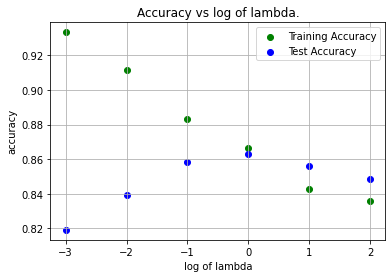

In [62]:
plot_acc(acc_train_svm_rbf, acc_test_svm_rbf, lamb)

In [63]:
def svm_polynomial(c):
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_polynomial.fit(X_train,Y_train)
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    acc_train = svc_polynomial.score(X_train,Y_train)
    acc_train_svm_poly.append(acc_train)
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    acc_test = svc_polynomial.score(X_test,Y_test)
    acc_test_svm_poly.append(acc_test)

In [64]:
acc_train_svm_poly = []
acc_test_svm_poly = []
for c in cVals:
    svm_polynomial(c)

In [68]:
max_acc = max(acc_test_svm_poly)
index = acc_test_svm_poly.index(max_acc)
print(max_acc, lamb[index])

0.8627145085803433 0.1


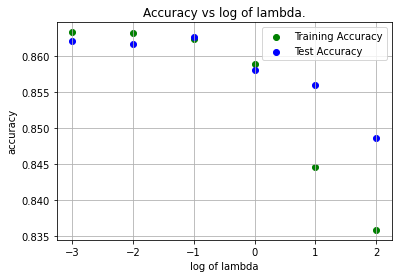

In [65]:
plot_acc(acc_train_svm_poly, acc_test_svm_poly, lamb)

In [98]:
def svm_linear(c,penalty):
    svm_linear = svm.LinearSVC(penalty=penalty,C = c, max_iter=4000,dual=False)
    svm_linear.fit(X_train, Y_train)


    acc_train = svm_linear.score(X_train, Y_train)
    
    acc_train_svm_linear.append(acc_train)
    
  
    acc_test = svm_linear.score(X_test, Y_test)

    acc_test_svm_linear.append(acc_test)
    weight_svm_linear.append(svm_linear.coef_[0])
    intercept_svm_linear.append(svm_linear.intercept_)

In [109]:
acc_train_svm_linear = []
acc_test_svm_linear = []
weight_svm_linear = []
intercept_svm_linear = []
for c in cVals:
    svm_linear(c,"l1")

0.8554342173686947 100


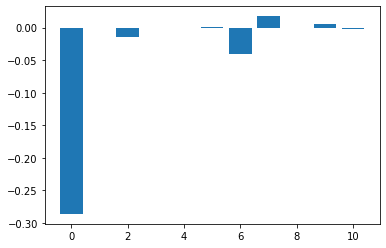

In [110]:
plot_weight(acc_test_svm_linear, weight_svm_linear)

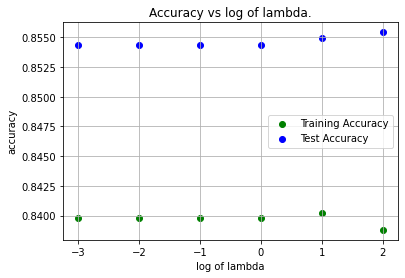

In [111]:
plot_acc(acc_train_svm_linear, acc_test_svm_linear, lamb)

In [112]:
acc_train_svm_linear = []
acc_test_svm_linear = []
weight_svm_linear = []
intercept_svm_linear = []
for c in cVals:
    svm_linear(c,"l2")

0.8543941757670307 0.001


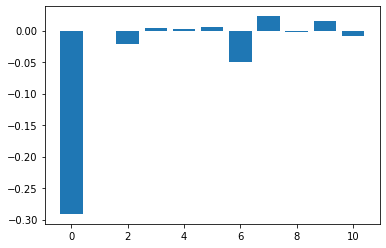

In [113]:
plot_weight(acc_test_svm_linear, weight_svm_linear)

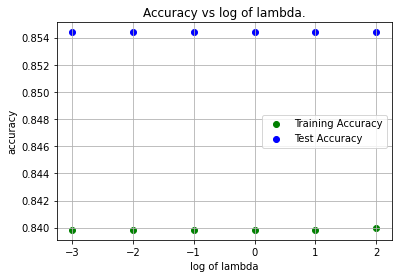

In [114]:
plot_acc(acc_train_svm_linear, acc_test_svm_linear, lamb)